# <h1><center>Fraud Detection Case study</center></h1>

Given Dataset: Dataset contain actual transaction with anonymized features and a time and a class feature (0 = non fraud, 1 = fraud)
Objective: built a robust model that can predict whether a transaction is fraudulent or not.
I built a deep learning model using Keras and Tensorflow to achieve the task.

Process:
- Imported and cleaned the data by standardizing the data using Sklearn StandardScalar.
- Built a deep learning model using TensorFlow and Keras with a 99% accuracy, yet with misclassified fraudulent transactions (false negatives) which we need to get rid of.
- Tested other ML algorithms such as Random Forest to find ones with best predictive power.
- Optimized model by undersampling and oversampling unbalanced data which gave a model with 99% accuracy and no misclassified fraudulent transactions.

**Import and explore the data**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
np.random.seed(123)

In [2]:
dataset = pd.read_csv('creditcard.csv')

In [3]:
dataset.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
# check the columns
list(dataset)

['Time',
 'V1',
 'V2',
 'V3',
 'V4',
 'V5',
 'V6',
 'V7',
 'V8',
 'V9',
 'V10',
 'V11',
 'V12',
 'V13',
 'V14',
 'V15',
 'V16',
 'V17',
 'V18',
 'V19',
 'V20',
 'V21',
 'V22',
 'V23',
 'V24',
 'V25',
 'V26',
 'V27',
 'V28',
 'Amount',
 'Class']

In [5]:
# check for nulls
dataset.isnull().sum()

Time      0
V1        0
V2        0
V3        0
V4        0
V5        0
V6        0
V7        0
V8        0
V9        0
V10       0
V11       0
V12       0
V13       0
V14       0
V15       0
V16       0
V17       0
V18       0
V19       0
V20       0
V21       0
V22       0
V23       0
V24       0
V25       0
V26       0
V27       0
V28       0
Amount    0
Class     0
dtype: int64

In [6]:
dataset.shape

(284807, 31)

**Perform data Preprocessing**

In [7]:
# normlize the variables to make them have similar scales
from sklearn.preprocessing import StandardScaler
dataset['normaliedAmount'] = StandardScaler().fit_transform(dataset['Amount'].values.reshape(-1,1))
dataset = dataset.drop(['Amount'], axis=1)
dataset.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Class,normaliedAmount
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,-0.551600,-0.617801,-0.991390,-0.311169,1.468177,-0.470401,0.207971,0.025791,0.403993,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,1.612727,1.065235,0.489095,-0.143772,0.635558,0.463917,-0.114805,-0.183361,-0.145783,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,0.624501,0.066084,0.717293,-0.165946,2.345865,-2.890083,1.109969,-0.121359,-2.261857,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,-0.226487,0.178228,0.507757,-0.287924,-0.631418,-1.059647,-0.684093,1.965775,-1.232622,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,-0.822843,0.538196,1.345852,-1.119670,0.175121,-0.451449,-0.237033,-0.038195,0.803487,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.073403


In [8]:
# drop the time variable 
dataset = dataset.drop(['Time'], axis=1)

In [9]:
X = dataset.iloc[:, dataset.columns !='Class']
y = dataset.iloc[:, dataset.columns == 'Class']

**Modeling**

In [10]:
# data splitting
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)
print(X_train.shape)
print(X_test.shape)

(199364, 29)
(85443, 29)


In [11]:
#Convert train and test into arrays for deep learning model
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [12]:
# build sequential model with 5 layers, 85 units and dropout to prevent overfitting

from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout

model = Sequential([
    Dense(units = 16, input_dim = 29,activation='relu'),
    Dense(units=24,activation='relu'),
    Dropout(0.5),
    Dense(20,activation='relu'),
    Dense(24, activation= 'relu'),
    Dense(1,activation='sigmoid'),
    
])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 16)                480       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                408       
_________________________________________________________________
dropout (Dropout)            (None, 24)                0         
_________________________________________________________________
dense_2 (Dense)              (None, 20)                500       
_________________________________________________________________
dense_3 (Dense)              (None, 24)                504       
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 25        
Total params: 1,917
Trainable params: 1,917
Non-trainable params: 0
______________________________________________________

In [13]:
# compile
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15, epochs=5)

Epoch 1/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0275 - accuracy: 0.9928
Epoch 2/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0047 - accuracy: 0.9993
Epoch 3/5
13291/13291 [==============================] - 19s 1ms/step - loss: 0.0040 - accuracy: 0.9994
Epoch 4/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0033 - accuracy: 0.9995
Epoch 5/5
13291/13291 [==============================] - 20s 1ms/step - loss: 0.0031 - accuracy: 0.9994


In [14]:
#evaulate the model
score = model.evaluate(X_test, y_test)
print(score)

2671/2671 [==============================] - 3s 938us/step - loss: 0.0028 - accuracy: 0.9993
[0.002759068040177226, 0.9993445873260498]


In [18]:
import matplotlib.pyplot as plt
import itertools

from sklearn import svm, datasets
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(cm, 
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix
    """
    classes=[0,1]

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [16]:
from sklearn.metrics import confusion_matrix
y_pred = model.predict(X_test)
y_test = pd.DataFrame(y_test)
cm = confusion_matrix(y_test, y_pred.round())

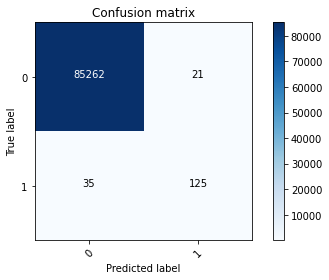

In [19]:
plot_confusion_matrix(cm)
plt.show()

In [20]:
## build random forest classifier 

# s[]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size = 0.3)

In [21]:
from sklearn.ensemble import RandomForestClassifier
# initialize random forest
random_forest = RandomForestClassifier(n_estimators = 100)

# fit
random_forest.fit(X_train,y_train.values.ravel())

# predict
y_pred = random_forest.predict(X_test)

# score
random_forest.score(X_test, y_test)

0.9996839998595555

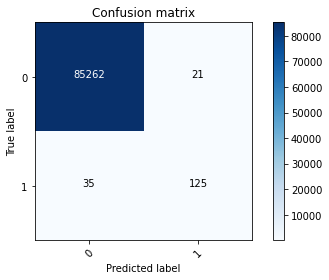

In [22]:
plot_confusion_matrix(cm)

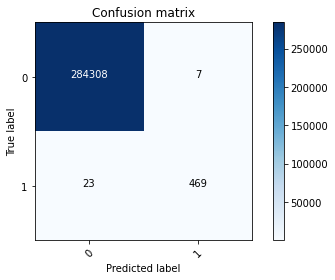

In [23]:
# predict on the whole dataset
y_pred = random_forest.predict(X)
cm = confusion_matrix(y,y_pred.round())
plot_confusion_matrix(cm)

**Perform optimzation using sampling techniques**

In [24]:
# undersampling

fraud_indices = np.array(dataset[dataset.Class == 1].index) #built an array of the fraud rows class
number_records_fraud = len(fraud_indices)
print(number_records_fraud)

492


In [25]:
normal_indices = dataset[dataset.Class == 0].index ## built an array of data of the non fraud rows class 

In [26]:
random_normal_indices = np.random.choice(normal_indices, number_records_fraud, replace=False)
random_normal_indices = np.array(random_normal_indices)
print(len(random_normal_indices))

492


In [27]:
under_sample_indices = np.concatenate([fraud_indices, random_normal_indices])
print(len(under_sample_indices))

984


In [28]:
under_sample_data = dataset.iloc[under_sample_indices,:]

In [29]:
X_undersample = under_sample_data.iloc[:, under_sample_data.columns != 'Class']
y_undersample = under_sample_data.iloc[:, under_sample_data.columns == 'Class']

In [30]:
# split undersampled data
X_train, X_test, y_train, y_test = train_test_split(X_undersample, y_undersample, test_size = 0.3)

In [31]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [32]:
# test using DL model
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15, epochs=5)

Epoch 1/5
46/46 [==============================] - 1s 2ms/step - loss: 0.4289 - accuracy: 0.9016
Epoch 2/5
46/46 [==============================] - 0s 1ms/step - loss: 0.1647 - accuracy: 0.9164
Epoch 3/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1515 - accuracy: 0.9422
Epoch 4/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1530 - accuracy: 0.9451
Epoch 5/5
46/46 [==============================] - 0s 2ms/step - loss: 0.1146 - accuracy: 0.9578


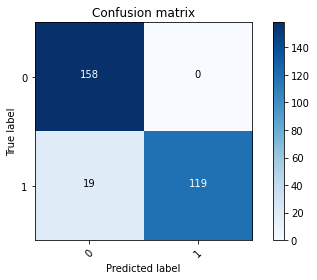

In [33]:
# predict X_test
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

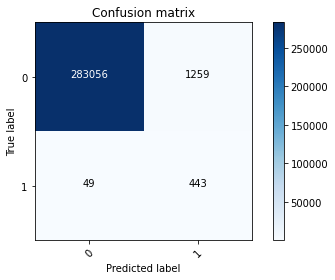

In [34]:
# predict X
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

In [35]:
# oversampling (SMOTE)
from imblearn.over_sampling import SMOTE

X_resample, y_resample = SMOTE().fit_sample(X, y.values.ravel())
y_resample = pd.DataFrame(y_resample)
X_resample = pd.DataFrame(X_resample)

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:144: FutureWarning: The sklearn.neighbors.base module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.neighbors. Anything that cannot be imported from sklearn.neighbors is now part of the private API.
  warnings.warn(message, FutureWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function safe_indexing is deprecated; safe_indexing is deprecated in version 0.22 and will be removed in version 0.24.
  warnings.warn(msg, category=FutureWarning)


In [36]:
# split resampled data
X_train, X_test, y_train, y_test = train_test_split(X_resample,y_resample, test_size = 0.3)

In [37]:
X_train = np.array(X_train)
X_test = np.array(X_test)
y_train = np.array(y_train)
y_test = np.array(y_test)

In [38]:
model.compile(optimizer='adam',loss='binary_crossentropy', metrics=['accuracy'])
model.fit(X_train,y_train,batch_size=15, epochs=5)

Epoch 1/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0452 - accuracy: 0.9827
Epoch 2/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0146 - accuracy: 0.9961
Epoch 3/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0110 - accuracy: 0.9972
Epoch 4/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0096 - accuracy: 0.9975
Epoch 5/5
26537/26537 [==============================] - 39s 1ms/step - loss: 0.0085 - accuracy: 0.9980


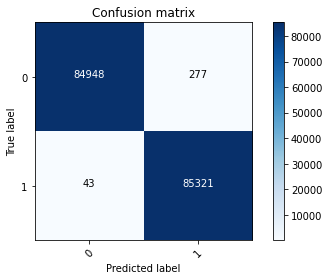

In [39]:
# predict X_test
y_pred = model.predict(X_test)
y_expected = pd.DataFrame(y_test)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

In [40]:
random_forest.score(X_test, y_test)

0.9114655692922756

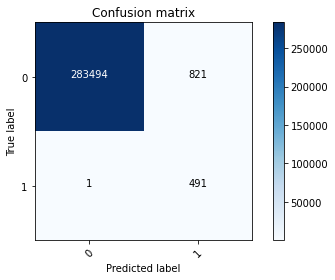

In [41]:
# predict X
y_pred = model.predict(X)
y_expected = pd.DataFrame(y)
cm = confusion_matrix(y_expected, y_pred.round())
plot_confusion_matrix(cm)
plt.show()

In [42]:
random_forest.score(X, y)

0.999894665510328